<a href="https://colab.research.google.com/github/Bhavyamadhuri/Bhavya_INFO5731_Fall2024/blob/main/Bhavya_Devarakonda_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# dataset
sample_data = [
    "I love this product, it's amazing!",
    "The service was terrible and slow.",
    "I'm very happy with the results.",
    "Not great, not terrible, just okay.",
    "Absolutely fantastic experience!",
    "The product quality is excellent, very satisfied.",
    "This was the worst experience I've ever had.",
    "Good value for the money.",
    "Terrible support, very frustrating.",
    "The delivery was quick and the package arrived in perfect condition.",
    "I would recommend this to anyone.",
    "It didn't meet my expectations, quite disappointing.",
    "The product works well, but the battery life could be better.",
    "Superb quality and fast delivery!",
    "I wouldn’t buy this again, poor quality.",
    "Highly recommend this item, it’s worth every penny!",
    "The website was easy to navigate and checkout was smooth.",
    "The food was delicious and the service was outstanding.",
    "Not worth the price, very mediocre.",
    "I had an amazing experience, would definitely go back.",
    "It’s okay, nothing special.",
    "The instructions were unclear and hard to follow.",
    "Beautifully crafted product, I love it.",
    "Customer service was very helpful and resolved my issue quickly.",
    "The packaging was damaged upon arrival, but the product itself was fine.",
]

# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

processed_data = [preprocess(text) for text in sample_data]

# Dictionary and Corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Compute Coherence Scores for Different K Values
def compute_coherence_values(corpus, dictionary, k_values, texts):
    coherence_values = []
    for k in k_values:
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append((k, coherence_model.get_coherence()))
    return coherence_values

# Range of K values and optimal K selection
k_values = range(2, 6)
coherence_values = compute_coherence_values(corpus, dictionary, k_values, processed_data)
optimal_k = max(coherence_values, key=lambda x: x[1])[0]

# Train Final Model with Optimal K
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k, random_state=42, passes=10)
topics = lda_model.print_topics(num_words=5)

print("Optimal K:", optimal_k)
print("Coherence Scores:", coherence_values)
print("Topics:", topics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal K: 5
Coherence Scores: [(2, 0.4518172663755642), (3, 0.4716584268551247), (4, 0.5010207614076456), (5, 0.549888179729735)]
Topics: [(0, '0.054*"worth" + 0.030*"recommend" + 0.030*"’" + 0.030*"delivery" + 0.030*"highly"'), (1, '0.050*"experience" + 0.050*"product" + 0.035*"amazing" + 0.035*"’" + 0.019*"could"'), (2, '0.062*"product" + 0.034*"love" + 0.034*"quality" + 0.034*"okay" + 0.034*"follow"'), (3, '0.034*"quality" + 0.034*"would" + 0.034*"service" + 0.034*"quickly" + 0.034*"issue"'), (4, '0.059*"terrible" + 0.059*"service" + 0.059*"slow" + 0.010*"quality" + 0.010*"okay"')]


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
from gensim import corpora
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Dataset
sample_data = [
    "I love this product, it's amazing!",
    "The service was terrible and slow.",
    "I'm very happy with the results.",
    "Not great, not terrible, just okay.",
    "Absolutely fantastic experience!",
    "The product quality is excellent, very satisfied.",
    "This was the worst experience I've ever had.",
    "Good value for the money.",
    "Terrible support, very frustrating.",
    "The delivery was quick and the package arrived in perfect condition.",
    "I would recommend this to anyone.",
    "It didn't meet my expectations, quite disappointing.",
    "The product works well, but the battery life could be better.",
    "Superb quality and fast delivery!",
    "I wouldn’t buy this again, poor quality.",
    "Highly recommend this item, it’s worth every penny!",
    "The website was easy to navigate and checkout was smooth.",
    "The food was delicious and the service was outstanding.",
    "Not worth the price, very mediocre.",
    "I had an amazing experience, would definitely go back.",
    "It’s okay, nothing special.",
    "The instructions were unclear and hard to follow.",
    "Beautifully crafted product, I love it.",
    "Customer service was very helpful and resolved my issue quickly.",
    "The packaging was damaged upon arrival, but the product itself was fine.",
]

# Preprocess for LSA
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_lsa(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

# Preprocess the data
processed_data_lsa = [preprocess_lsa(text) for text in sample_data]

# Create a Dictionary for coherence calculations
dictionary = corpora.Dictionary(processed_data_lsa)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(text) for text in processed_data_lsa])

# Coherence Score Calculation for Different Number of Topics
def compute_coherence_values_lsa(X, k_values, texts, dictionary):
    coherence_values = []
    for k in k_values:
        lsa_model = TruncatedSVD(n_components=k, random_state=42)
        lsa_model.fit(X)

        topics = []
        terms = vectorizer.get_feature_names_out()
        for topic in lsa_model.components_:
            top_terms = [terms[i] for i in topic.argsort()[-5:]]
            topics.append(top_terms)

        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append((k, coherence_model.get_coherence()))
    return coherence_values

# Define range for K (number of topics)
k_values = range(2, 6)
coherence_values_lsa = compute_coherence_values_lsa(X, k_values, processed_data_lsa, dictionary)

# Select the optimal number of topics (K) based on highest coherence score
optimal_k_lsa = max(coherence_values_lsa, key=lambda x: x[1])[0]

# Final LSA Model with Optimal K
lsa_model_final = TruncatedSVD(n_components=optimal_k_lsa, random_state=42)
lsa_model_final.fit(X)
terms = vectorizer.get_feature_names_out()

optimal_topics = []
for topic in lsa_model_final.components_:
    top_terms = [terms[i] for i in topic.argsort()[-5:]]
    optimal_topics.append(top_terms)

print("Optimal K:", optimal_k_lsa)
print("Coherence Scores:", coherence_values_lsa)
print("Topics:", optimal_topics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Optimal K: 3
Coherence Scores: [(2, 0.43788504818429663), (3, 0.49423523613855297), (4, 0.3849145253814393), (5, 0.41907300772726136)]
Topics: [['crafted', 'quality', 'amazing', 'love', 'product'], ['great', 'slow', 'okay', 'service', 'terrible'], ['definitely', 'recommend', 'amazing', 'would', 'experience']]


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
#Answered Question 3(Alternative)

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# dataset
sample_data = [
    "I love this product, it's amazing!",
    "The service was terrible and slow.",
    "I'm very happy with the results.",
    "Not great, not terrible, just okay.",
    "Absolutely fantastic experience!",
    "The product quality is excellent, very satisfied.",
    "This was the worst experience I've ever had.",
    "Good value for the money.",
    "Terrible support, very frustrating.",
    "The delivery was quick and the package arrived in perfect condition.",
    "I would recommend this to anyone.",
    "It didn't meet my expectations, quite disappointing.",
    "The product works well, but the battery life could be better.",
    "Superb quality and fast delivery!",
    "I wouldn’t buy this again, poor quality.",
    "Highly recommend this item, it’s worth every penny!",
    "The website was easy to navigate and checkout was smooth.",
    "The food was delicious and the service was outstanding.",
    "Not worth the price, very mediocre.",
    "I had an amazing experience, would definitely go back.",
    "It’s okay, nothing special.",
    "The instructions were unclear and hard to follow.",
    "Beautifully crafted product, I love it.",
    "Customer service was very helpful and resolved my issue quickly.",
    "The packaging was damaged upon arrival, but the product itself was fine.",
]

# Initialize UMAP and HDBSCAN with adjusted settings for dimensionality reduction and clustering
umap_model = UMAP(n_neighbors=5, n_components=5, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=5)

# Set up BERTopic with custom vectorizer for stop words removal
vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2))
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model)

# Fit the model on the expanded sample data
topics, _ = topic_model.fit_transform(sample_data)

# Display topic information
print(topic_model.get_topic_info())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   Topic  Count                                           Name  \
0     -1     11   -1_experience_okay_issue_special beautifully   
1      0      7  0_product_recommend_quality_packaging damaged   
2      1      7               1_terrible_service_arrived_quite   

                                      Representation  \
0  [experience, okay, issue, special beautifully,...   
1  [product, recommend, quality, packaging damage...   
2  [terrible, service, arrived, quite, website ea...   

                                 Representative_Docs  
0  [Absolutely fantastic experience!, Customer se...  
1  [Highly recommend this item, it’s worth every ...  
2  [The food was delicious and the service was ou...  


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


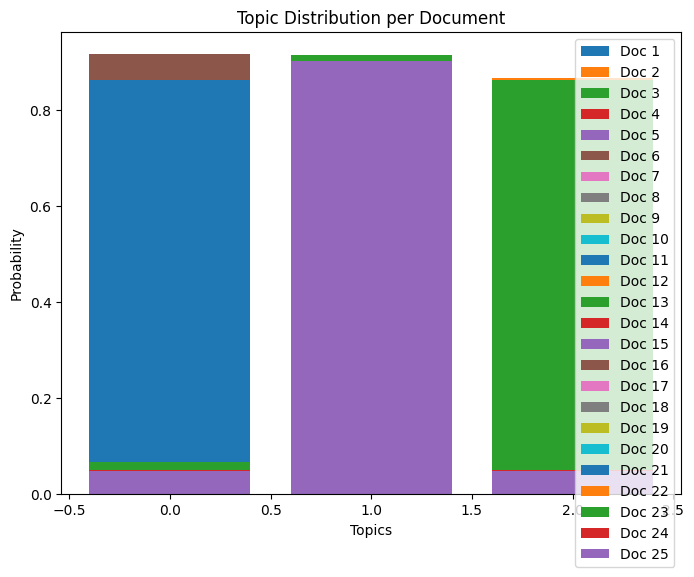

In Visualization 1, each document represents one customer feedback sentence from the dataset. For instance, Document 1 is 'I love this product, it’s amazing!' and Document 2 is 'The service was terrible and slow.' The topics represent themes identified by the LDA model, such as positive feedback, complaints, and neutral experiences. Visualization 1 shows the topic distribution per document, with bars representing each document and segments showing the likelihood of each topic. This helps determine if a document leans toward satisfaction, complaints, or balanced opinions.


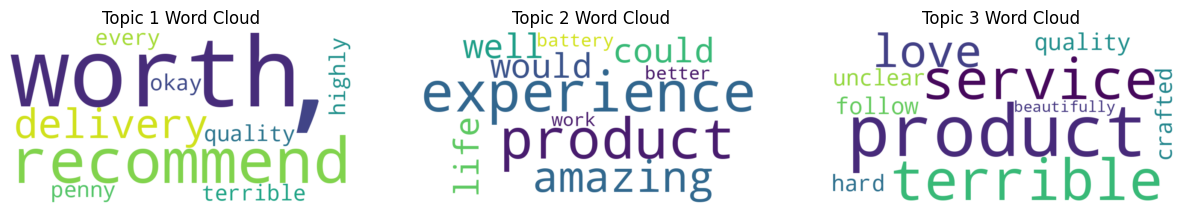

In Visualization 2, each word cloud represents a specific topic identified by the LDA model. Topics are themes discovered within the dataset, such as positive feedback, negative experiences, or general satisfaction. The word clouds display the most important words for each topic, with word size indicating relevance within the topic. For example, larger words like 'amazing' or 'terrible' suggest key terms defining positive or negative themes. This visualization helps interpret each topic by highlighting the words that most strongly represent it, making themes easier to identify.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.082649 -0.036874       1        1  48.835224
0     -0.086489 -0.032172       2        1  28.832284
2      0.003840  0.069046       3        1  22.332492, topic_info=         Term      Freq     Total Category  logprob  loglift
50          ’  2.000000  2.000000  Default  30.0000  30.0000
55      worth  1.000000  1.000000  Default  29.0000  29.0000
33  recommend  1.000000  1.000000  Default  28.0000  28.0000
3     product  3.000000  3.000000  Default  27.0000  27.0000
11       okay  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
14  fantastic  0.157877  1.162012   Topic3  -5.0289  -0.4970
46       fast  0.157866  1.161992   Topic3  -5.0290  -0.4970
28   delivery  0.158080  1.687258   Topic3  -5.0277  -0.8686
34      would  0.158050  1.689529   Topic3  -5.0278  -0.8702
1     amazing  0.157974  1.784156   Topic3  -5.0283  -0.9251

[138 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7         1  0.860581          'm
0         1  0.860605          's
12        1  0.860585  absolutely
1         1  0.560489     amazing
32        2  0.936667      anyone
...     ...       ...         ...
45        1  0.860421        work
55        2  0.626978       worth
34        1  0.591881       would
34        2  0.591881       would
50        2  0.942355           ’

[92 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# dataset
sample_data = [
    "I love this product, it's amazing!",
    "The service was terrible and slow.",
    "I'm very happy with the results.",
    "Not great, not terrible, just okay.",
    "Absolutely fantastic experience!",
    "The product quality is excellent, very satisfied.",
    "This was the worst experience I've ever had.",
    "Good value for the money.",
    "Terrible support, very frustrating.",
    "The delivery was quick and the package arrived in perfect condition.",
    "I would recommend this to anyone.",
    "It didn't meet my expectations, quite disappointing.",
    "The product works well, but the battery life could be better.",
    "Superb quality and fast delivery!",
    "I wouldn’t buy this again, poor quality.",
    "Highly recommend this item, it’s worth every penny!",
    "The website was easy to navigate and checkout was smooth.",
    "The food was delicious and the service was outstanding.",
    "Not worth the price, very mediocre.",
    "I had an amazing experience, would definitely go back.",
    "It’s okay, nothing special.",
    "The instructions were unclear and hard to follow.",
    "Beautifully crafted product, I love it.",
    "Customer service was very helpful and resolved my issue quickly.",
    "The packaging was damaged upon arrival, but the product itself was fine.",
]

# Preprocess texts function
def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    processed_texts = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
        processed_texts.append(tokens)

    return processed_texts

# Preprocess the sample data
processed_data = preprocess(sample_data)

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]

# Train LDA model
num_topics = 3
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Visualization 1: Topic Distribution for Each Document
doc_topics = [lda_model.get_document_topics(doc) for doc in corpus]

plt.figure(figsize=(8, 6))
for doc_id, topic_probs in enumerate(doc_topics):
    topics = [t[0] for t in topic_probs]
    probabilities = [t[1] for t in topic_probs]
    plt.bar(topics, probabilities, label=f'Doc {doc_id + 1}')

plt.xlabel('Topics')
plt.ylabel('Probability')
plt.title('Topic Distribution per Document')
plt.legend()
plt.show()

print(
    "In Visualization 1, each document represents one customer feedback sentence from the dataset. "
    "For instance, Document 1 is 'I love this product, it’s amazing!' and Document 2 is 'The service was terrible and slow.' "
    "The topics represent themes identified by the LDA model, such as positive feedback, complaints, and neutral experiences. "
    "Visualization 1 shows the topic distribution per document, with bars representing each document and segments showing the likelihood of each topic. "
    "This helps determine if a document leans toward satisfaction, complaints, or balanced opinions."
)

# Visualization 2: Word Clouds for Each Topic
fig, axes = plt.subplots(1, num_topics, figsize=(15, 5))
for i, ax in enumerate(axes):
    word_freq = dict(lda_model.show_topic(i, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i+1} Word Cloud')
plt.show()

print(
    "In Visualization 2, each word cloud represents a specific topic identified by the LDA model. "
    "Topics are themes discovered within the dataset, such as positive feedback, negative experiences, or general satisfaction. "
    "The word clouds display the most important words for each topic, with word size indicating relevance within the topic. "
    "For example, larger words like 'amazing' or 'terrible' suggest key terms defining positive or negative themes. "
    "This visualization helps interpret each topic by highlighting the words that most strongly represent it, making themes easier to identify."
)

# Visualization 3: Intertopic Distance Map using pyLDAvis
pyLDAvis.enable_notebook()
lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
lda_vis_data  # Display this in a Jupyter notebook environment


In [ ]:
print(
    "In Visualization 3, the intertopic distance map shows relationships between topics identified by the LDA model. "
    "Each circle represents a topic, and the distance between circles indicates topic similarity; closer circles suggest related themes. "
    "For instance, topics about positive experiences may be closer to each other, while distinct themes are farther apart. "
    "Circle size represents the prominence of each topic in the dataset, with larger circles indicating more common topics. "
    "This visualization helps understand how topics overlap or differ, providing insights into the structure of themes within the dataset."
)

In Visualization 3, the intertopic distance map shows relationships between topics identified by the LDA model. Each circle represents a topic, and the distance between circles indicates topic similarity; closer circles suggest related themes. For instance, topics about positive experiences may be closer to each other, while distinct themes are farther apart. Circle size represents the prominence of each topic in the dataset, with larger circles indicating more common topics. This visualization helps understand how topics overlap or differ, providing insights into the structure of themes within the dataset.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
print(
    "Among LDA, LSA, and BERTopic, BERTopic was the most effective for identifying topics, especially with complex or nuanced data. "
    "LDA works well on large datasets with clear topics, but it struggles with smaller datasets and lacks context depth. "
    "LSA can handle small datasets better and captures hidden themes but is less clear in its output and can pick up noise. "
    "BERTopic, by using advanced embeddings, understands word context and offers coherent topics with interactive visuals, "
    "making it the best choice for datasets with varied and complex themes."
)


Among LDA, LSA, and BERTopic, BERTopic was the most effective for identifying topics, especially with complex or nuanced data. LDA works well on large datasets with clear topics, but it struggles with smaller datasets and lacks context depth. LSA can handle small datasets better and captures hidden themes but is less clear in its output and can pick up noise. BERTopic, by using advanced embeddings, understands word context and offers coherent topics with interactive visuals, making it the best choice for datasets with varied and complex themes.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
    "This exercise provided a solid learning experience in processing text data and applying different topic modeling algorithms like LDA, LSA, and BERTopic. "
    "Working with these models clarified how each one extracts features: LDA uses probabilistic distributions, LSA captures hidden themes through dimensionality reduction, "
    "and BERTopic applies contextual embeddings to capture more nuanced meanings. Implementing them showed me how each model interprets topics uniquely, enhancing my understanding of feature extraction in NLP."
    "One of the main challenges was dealing with small datasets, as LDA and LSA struggled with coherence, while BERTopic required significant computational power. "
    "Another challenge was balancing interpretability and performance, especially for algorithms like BERTopic, which can overfit small data."
    "Overall, this exercise was highly relevant to NLP, as topic modeling is essential in applications like text summarization, sentiment analysis, and document classification. "
    "It emphasized the importance of selecting the right model based on data size, complexity, and interpretability requirements."
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n    "This exercise provided a solid learning experience in processing text data and applying different topic modeling algorithms like LDA, LSA, and BERTopic. "\n    "Working with these models clarified how each one extracts features: LDA uses probabilistic distributions, LSA captures hidden themes through dimensionality reduction, "\n    "and BERTopic applies contextual embeddings to capture more nuanced meanings. Implementing them showed me how each model interprets topics uniquely, enhancing my understanding of feature extraction in NLP."\n    "One of the main challenges was dealing with small datasets, as LDA and LSA struggled with coherence, while BERTopic required significant computational power. "\n    "Another challenge was balancing interpretability and performance, especially for algorithms like BERTopic, which can overfit small data."\n    "Overall, this exercise was highly relevant to NLP, as topic modeling is essential in applications like text summarization, sentiment a